# 高斯混合聚类 

CSDN csdn_inside: [GMM 高斯混合模型 聚类 Python实现](https://blog.csdn.net/csdn_inside/article/details/85267341)

[西瓜书数据集4.0](https://blog.csdn.net/xxliu_csdn/article/details/86483816)

<div><img src="./img/0901.png", width=900>

In [1]:
import pandas as pd
data=pd.read_csv('data_watermelon/watermelon_4.csv')
data.head()

,a,b
0,0.697,0.460
1,0.774,0.376
2,0.634,0.264
3,0.608,0.318
4,0.556,0.215


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
a    30 non-null float64
b    30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [3]:
# 数据信息
n_samples=data.shape[0]
n_samples

30

In [4]:
n_features = data.shape[1]
n_features

2

<div><img src="./img/0902.png", width=900>

In [5]:
# 设置超参数
n_clusters = 3

In [6]:
# 初始化设置
import numpy as np
alpha = np.ones(n_clusters)/n_clusters
alpha

array([0.33333333, 0.33333333, 0.33333333])

In [7]:
mu = np.array([[.403,.237],[.714,.346],[.532,.472]])
mu

array([[0.403, 0.237],
       [0.714, 0.346],
       [0.532, 0.472]])

In [8]:
sigma = np.full((n_clusters,n_features,n_features),np.diag(np.full(n_features,0.1)))
sigma

array([[[0.1, 0. ],
        [0. , 0.1]],

       [[0.1, 0. ],
        [0. , 0.1]],

       [[0.1, 0. ],
        [0. , 0.1]]])

## 多元高斯分布

<div><img src="./img/0906.png", width=700>

计算数组的行列式

In [9]:
np.linalg.det(sigma[0])

0.010000000000000004

行列式的结果开根号

In [10]:
pow(np.linalg.det(sigma[0]),0.5)

0.10000000000000002

In [11]:
X = data.values
X.shape

(30, 2)

In [12]:
X[0]

array([0.697, 0.46 ])

In [13]:
(X[0] - mu[0]).T

array([0.294, 0.223])

In [14]:
# 计算一个多元高斯分布
# 其中x mu 1*2 ，sigma 2*2
def multiGaussian(x,mu,sigma):
    a = 1/((2*np.pi)*pow(np.linalg.det(sigma),0.5))
    b = np.exp(-0.5*(x-mu).dot(np.linalg.pinv(sigma)).dot((x-mu).T))
    return a*b

multiGaussian(X[0], mu[0], sigma[0])

0.805641057775526

## 高斯混合

<div><img src="./img/0907.png", width=700>

In [15]:
gamma=np.zeros((n_samples,n_clusters))

In [16]:
p=np.zeros(n_clusters)
p

array([0., 0., 0.])

In [17]:
g=np.zeros(n_clusters)
g

array([0., 0., 0.])

In [18]:
# 计算x_0的高斯混合
## u_0时
p[0]=multiGaussian(X[0],mu[0],sigma[0])
p[0]

0.805641057775526

In [19]:
g[0]=alpha[0]*p[0]
g[0]

0.26854701925850866

In [20]:
# 计算所有x在所有cluster上的高斯混合
def computeGamma(X,mu,sigma,alpha,multiGaussian):
    n_samples = X.shape[0] # 30个样本
    n_clusters = len(alpha) # 3个聚类
    gamma=np.zeros((n_samples,n_clusters)) # 存最后的结果，每个x对应着三个gamma
    p=np.zeros(n_clusters) # 多元高斯概率 一个x对应三个
    g=np.zeros(n_clusters) # a*多元高斯概率 一个x对应三个
    for i in range(n_samples): # 每个x
        # 对于一个x
        for j in range(n_clusters):
            # 对于每一个聚类
            p[j]=multiGaussian(X[i],mu[j],sigma[j])
            g[j]=alpha[j]*p[j]
        for k in range(n_clusters):
            # 每一个x，每一个聚类，算一个gamma
            gamma[i,k]=g[k]/np.sum(g)
            # 每个x算出三个
    return gamma
gamma = computeGamma(X,mu,sigma,alpha,multiGaussian)
gamma.shape

(30, 3)

## EM算法迭代更新

<div><img src="./img/0904.png", width=700>

In [21]:
# 更新 alpha
alpha = np.sum(gamma,axis=0)/n_samples
alpha

array([0.36104113, 0.32326298, 0.31569589])

#### 更新mu 考虑一个x，一个聚类

In [22]:
gamma[:,0].shape

(30,)

In [25]:
gamma[:,0].reshape((n_samples,1)).shape

(30, 1)

In [26]:
(X*gamma[:,0].reshape((n_samples,1)))

array([[0.15246979, 0.10062569],
       [0.16450122, 0.07991274],
       [0.19631956, 0.08174821],
       [0.18419855, 0.09634069],
       [0.2043746 , 0.07902975],
       [0.17682102, 0.10398656],
       [0.20907716, 0.06476611],
       [0.18885348, 0.09118555],
       [0.23631904, 0.03228984],
       [0.12307463, 0.13523015],
       [0.14713564, 0.03423156],
       [0.18225724, 0.05260486],
       [0.21989474, 0.05540384],
       [0.2112001 , 0.06364934],
       [0.14455696, 0.14857243],
       [0.2458228 , 0.01741072],
       [0.2313865 , 0.03314716],
       [0.17357954, 0.09089959],
       [0.15937127, 0.11329934],
       [0.1386724 , 0.12637875],
       [0.19859964, 0.06159775],
       [0.17550091, 0.08504666],
       [0.17680522, 0.11420958],
       [0.15209254, 0.13904695],
       [0.16963889, 0.1192319 ],
       [0.14347891, 0.09342368],
       [0.14971191, 0.13282711],
       [0.16311597, 0.12966513],
       [0.15398079, 0.09451235],
       [0.14436769, 0.14857572]])

In [27]:
np.sum(X*gamma[:,0].reshape((n_samples,1)),axis=0)

array([5.31717872, 2.71884969])

In [30]:
np.sum(gamma,axis=0)[0]

10.831233991293141

In [31]:
# 更新 mu_0
mu[0]=np.sum(X*gamma[:,0].reshape((n_samples,1)),axis=0)/np.sum(gamma,axis=0)[0]
mu[0]

array([0.49091163, 0.25101938])

In [32]:
mu

array([[0.49091163, 0.25101938],
       [0.714     , 0.346     ],
       [0.532     , 0.472     ]])

#### 更新sigma

同样以gamma做权重

In [33]:
# 更新 sigma_0
sigma[0]=0
for j in range(n_samples):
    sigma[0]+=(X[j].reshape((1,n_features))-mu[0]).T.dot((X[j]-mu[0]).reshape((1,n_features)))*gamma[j,0]
sigma[0]=sigma[0]/np.sum(gamma,axis=0)[0]
sigma[0]

array([[0.02530905, 0.00413907],
       [0.00413907, 0.01586245]])

## 全部整合

In [37]:
import numpy as np
import matplotlib.pyplot as plt
 
def multiGaussian(x,mu,sigma):
    return 1/((2*np.pi)*pow(np.linalg.det(sigma),0.5))*np.exp(-0.5*(x-mu).dot(np.linalg.pinv(sigma)).dot((x-mu).T))
 
def computeGamma(X,mu,sigma,alpha,multiGaussian):
    n_samples=X.shape[0]
    n_clusters=len(alpha)
    gamma=np.zeros((n_samples,n_clusters))
    p=np.zeros(n_clusters)
    g=np.zeros(n_clusters)
    for i in range(n_samples):
        for j in range(n_clusters):
            p[j]=multiGaussian(X[i],mu[j],sigma[j])
            g[j]=alpha[j]*p[j]
        for k in range(n_clusters):
            gamma[i,k]=g[k]/np.sum(g)
    return gamma
 
class MyGMM():
    def __init__(self,n_clusters,ITER=50):
        self.n_clusters=n_clusters
        self.ITER=ITER
        self.mu=0
        self.sigma=0
        self.alpha=0
      
    def fit(self,data):
        n_samples=data.shape[0]
        n_features=data.shape[1]
        '''
        mu=data[np.random.choice(range(n_samples),self.n_clusters)]
        '''
        alpha=np.ones(self.n_clusters)/self.n_clusters
        
        mu=np.array([[.403,.237],[.714,.346],[.532,.472]])
        
        sigma=np.full((self.n_clusters,n_features,n_features),np.diag(np.full(n_features,0.1)))
        
        for i in range(self.ITER):
            gamma=computeGamma(data,mu,sigma,alpha,multiGaussian)
            alpha=np.sum(gamma,axis=0)/n_samples
            for i in range(self.n_clusters):
                mu[i]=np.sum(data*gamma[:,i].reshape((n_samples,1)),axis=0)/np.sum(gamma,axis=0)[i]
                sigma[i]=0
                for j in range(n_samples):
                    sigma[i]+=(data[j].reshape((1,n_features))-mu[i]).T.dot((data[j]-mu[i]).reshape((1,n_features)))*gamma[j,i]
                sigma[i]=sigma[i]/np.sum(gamma,axis=0)[i]
        self.mu=mu
        self.sigma=sigma
        self.alpha=alpha
        
    def predict(self,data):
        pred=computeGamma(data,self.mu,self.sigma,self.alpha,multiGaussian)
        cluster_results=np.argmax(pred,axis=1)
        return cluster_results


In [38]:
import pandas as pd
data=pd.read_csv('data_watermelon/watermelon_4.csv')

In [39]:
# X = np.array(data.values, dtype=float)
X = data.values

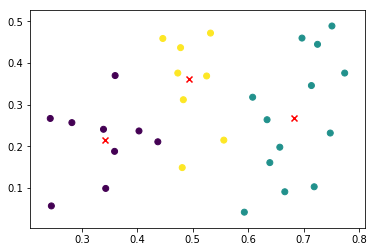

In [40]:
model1=MyGMM(3)
model1.fit(X)
result=model1.predict(X)
plt.scatter(X[:,0],X[:,1],c=result)
plt.scatter(model1.mu[:,0],model1.mu[:,1],marker='x',color='red');

<div><img src="./img/0905.png", width=700>